In [18]:
import numpy as np
import random, operator, pandas as pd
import matplotlib.pyplot as plt
import time 

In [19]:
# class definition of city, includes distance function, and a representation 
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [20]:
# fitness function - calculated as inverse of total distance of route
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0
    
    def routeDistance(self):
        if self.distance == 0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [21]:
# randomly mixing cities to get path representation
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [22]:
# creating population by using previous random generation function
def initial_population(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [23]:
# calculating fitness of each route and sorting the population
def rank_routes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()        
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [24]:
# selection of parents from which offspring are generated
# besides the good individuals, select individuals randomly
def selection(ranked_routes, no_of_good_individuals):
	selectionResults = []

	for i in range(0, no_of_good_individuals):
		selectionResults.append(ranked_routes[i][0])

	indexes = []
	for i in range(0, len(ranked_routes)):
		indexes.append(i)

	for i in range(0, len(ranked_routes) - no_of_good_individuals):
		j = random.choice(indexes)
		selectionResults.append(ranked_routes[j][0])

	return selectionResults

In [25]:
# getting parents(individuals) in a list
def create_mating_pool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [26]:
# Partially Mapped Crossover Operator(PMX)
def crossover(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    # geneA and geneB are two numbers between 0 and length of the 1st parent
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [27]:
def crossover_population(matingpool, no_of_good_individuals):
    children = []
    length = len(matingpool) - no_of_good_individuals
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,no_of_good_individuals):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = crossover(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [28]:
def mutate(individual, mutationRate):
    for index1 in range(len(individual)):
        if(random.random() < mutationRate):
            index2 = int(random.random() * len(individual))
            
            city_swap_tmp = individual[index1]
            
            individual[index1] = individual[index2]
            individual[index2] = city_swap_tmp
    return individual

In [29]:
def mutate_population(population, mutation_rate):
    mutated_population = []
    
    for ind in range(0, len(population)):
        mutated_index = mutate(population[ind], mutation_rate)
        mutated_population.append(mutated_index)
    return mutated_population

In [30]:
def next_generation(current_gen, no_of_good_individuals, mutation_rate):
    ranked_routes = rank_routes(current_gen)
    selection_results = selection(ranked_routes, no_of_good_individuals)
    matingpool = create_mating_pool(current_gen, selection_results)
    children = crossover_population(matingpool, no_of_good_individuals)
    next_generation = mutate_population(children, mutation_rate)
    return next_generation

In [31]:
def geneticAlgorithm(population, size_of_population, no_of_good_individuals, mutation_rate, generations):
    population = initial_population(size_of_population, population)
    print("Initial distance: " + str(1 / rank_routes(population)[0][1]))
    
    distance = []  
    distance.append(1 / rank_routes(population)[0][1])

    t_start = time.time()

    for i in range(0, generations):
        population = next_generation(population, no_of_good_individuals, mutation_rate)

    t_end = time.time()
    t = t_end - t_start 
    print("Time elapsed in seconds: ", t) 

    for i in range(0, generations):
        population = next_generation(population, no_of_good_individuals, mutation_rate)
        distance.append(1 / rank_routes(population)[0][1])
        
    plt.plot(distance)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show() 

    print("Final distance: " + str(1 / rank_routes(population)[0][1]))
    best_route_index = rank_routes(population)[0][0]
    best_route = population[best_route_index]
    return best_route

[(109,161), (187,142), (146,152), (99,62), (184,153), (117,88), (5,88), (161,58), (26,56), (179,104), (108,39), (191,12), (62,87), (174,74), (170,148), (116,104), (91,22), (12,152), (2,7), (35,41)]


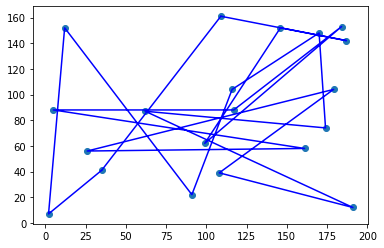

Initial distance: 1642.4352764740888
Time elapsed in seconds:  2.4589591026306152


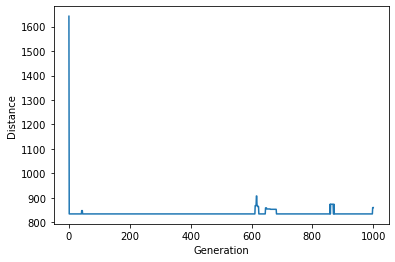

Final distance: 860.1902954113216
[(62,87), (12,152), (5,88), (2,7), (35,41), (26,56), (91,22), (108,39), (191,12), (161,58), (174,74), (179,104), (187,142), (184,153), (170,148), (146,152), (109,161), (116,104), (117,88), (99,62)]


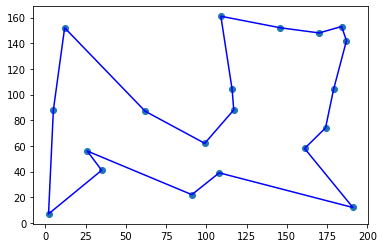

In [33]:
#1
numCities = 20
size_of_population = 50
no_of_good_individuals = 10 
mutation_rate = 0.01
generations = 1000

# cityList = []
# for i in range(0,numCities):
#     cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
cityList = [City(109,161), City(187,142), City(146,152), City(99,62), City(184,153), City(117,88), City(5,88), City(161,58), City(26,56), City(179,104), City(108,39), City(191,12), City(62,87), City(174,74), City(170,148), City(116,104), City(91,22), City(12,152), City(2,7), City(35,41)]

print(cityList)
x = [x.x for x in cityList]
y = [y.y for y in cityList]
x1=[x[0],x[-1]]
y1=[y[0],y[-1]]
plt.plot(x, y, 'b', x1, y1, 'b')
plt.scatter(x, y)
plt.show()

new_city_list = geneticAlgorithm(population=cityList, size_of_population=size_of_population, no_of_good_individuals=no_of_good_individuals, mutation_rate=mutation_rate, generations=generations)

print(new_city_list)
x = [x.x for x in new_city_list]
y = [y.y for y in new_city_list]
x1=[x[0],x[-1]]
y1=[y[0],y[-1]]
plt.plot(x, y, 'b', x1, y1, 'b')
plt.scatter(x, y)
plt.show()

[(106,101), (98,26), (88,8), (32,11), (111,29), (180,166), (29,196), (182,156), (42,121), (30,96), (101,156), (98,56), (198,158), (53,118), (58,84), (124,22), (193,80), (89,105), (3,179), (74,197)]


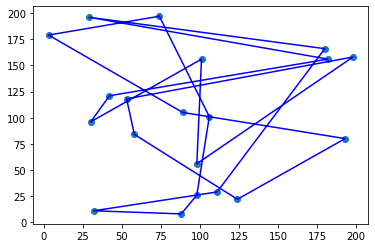

Initial distance: 1809.6781160488645
Time elapsed in seconds:  2.27998948097229


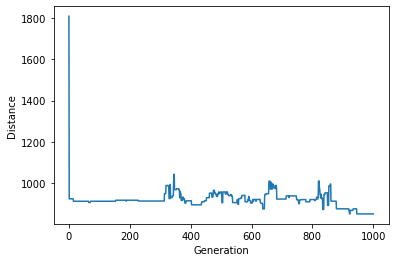

Final distance: 849.3156488729584
[(30,96), (53,118), (42,121), (3,179), (29,196), (74,197), (101,156), (180,166), (182,156), (198,158), (193,80), (124,22), (88,8), (32,11), (98,26), (111,29), (98,56), (106,101), (89,105), (58,84)]


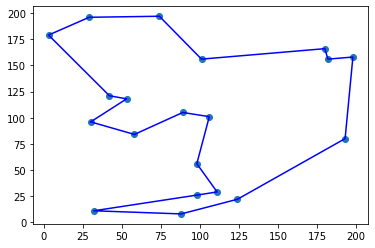

In [34]:
#2
numCities = 20
size_of_population = 50
no_of_good_individuals = 10 
mutation_rate = 0.01
generations = 1000

# cityList = []
# for i in range(0,numCities):
#     cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
cityList = [City(106,101), City(98,26), City(88,8), City(32,11), City(111,29), City(180,166), City(29,196), City(182,156), City(42,121), City(30,96), City(101,156), City(98,56), City(198,158), City(53,118), City(58,84), City(124,22), City(193,80), City(89,105), City(3,179), City(74,197)]

print(cityList)
x = [x.x for x in cityList]
y = [y.y for y in cityList]
x1=[x[0],x[-1]]
y1=[y[0],y[-1]]
plt.plot(x, y, 'b', x1, y1, 'b')
plt.scatter(x, y)
plt.show()

new_city_list = geneticAlgorithm(population=cityList, size_of_population=size_of_population, no_of_good_individuals=no_of_good_individuals, mutation_rate=mutation_rate, generations=generations)

print(new_city_list)
x = [x.x for x in new_city_list]
y = [y.y for y in new_city_list]
x1=[x[0],x[-1]]
y1=[y[0],y[-1]]
plt.plot(x, y, 'b', x1, y1, 'b')
plt.scatter(x, y)
plt.show()

[(46,186), (63,90), (77,40), (68,148), (117,53), (122,183), (86,68), (123,75), (67,87), (153,178), (138,11), (24,76), (66,41), (113,199), (126,35), (198,106), (40,146), (52,22), (16,144), (174,106)]


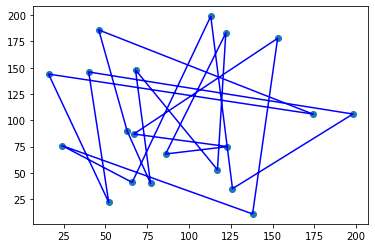

Initial distance: 1655.0805248585725
Time elapsed in seconds:  2.293897867202759


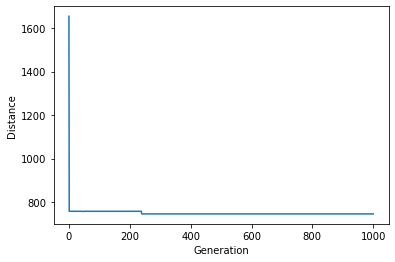

Final distance: 744.9539745645877
[(67,87), (63,90), (24,76), (16,144), (40,146), (68,148), (46,186), (113,199), (122,183), (153,178), (198,106), (174,106), (123,75), (117,53), (126,35), (138,11), (52,22), (66,41), (77,40), (86,68)]


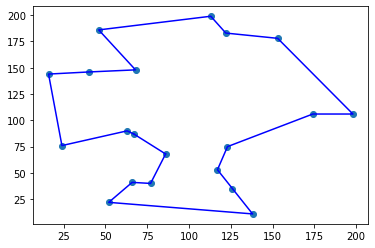

In [35]:
#3
numCities = 20
size_of_population = 50
no_of_good_individuals = 10 
mutation_rate = 0.01
generations = 1000

# cityList = []
# for i in range(0,numCities):
#     cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
cityList = [City(46,186), City(63,90), City(77,40), City(68,148), City(117,53), City(122,183), City(86,68), City(123,75), City(67,87), City(153,178), City(138,11), City(24,76), City(66,41), City(113,199), City(126,35), City(198,106), City(40,146), City(52,22), City(16,144), City(174,106)]

print(cityList)
x = [x.x for x in cityList]
y = [y.y for y in cityList]
x1=[x[0],x[-1]]
y1=[y[0],y[-1]]
plt.plot(x, y, 'b', x1, y1, 'b')
plt.scatter(x, y)
plt.show()

new_city_list = geneticAlgorithm(population=cityList, size_of_population=size_of_population, no_of_good_individuals=no_of_good_individuals, mutation_rate=mutation_rate, generations=generations)

print(new_city_list)
x = [x.x for x in new_city_list]
y = [y.y for y in new_city_list]
x1=[x[0],x[-1]]
y1=[y[0],y[-1]]
plt.plot(x, y, 'b', x1, y1, 'b')
plt.scatter(x, y)
plt.show()